<a href="https://colab.research.google.com/github/Aakash326/ML-models/blob/main/calories_traker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-dotenv

In [7]:
import google.generativeai as genai
import os
from dotenv import load_dotenv
from PIL import Image
import base64
import io
import json
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
genai.configure(api_key="")

# Initialize the model
model = genai.GenerativeModel("gemini-2.0-flash")

In [5]:
img="/content/Screenshot 2025-07-15 at 7.40.33 AM.png"
image = Image.open(img)
display(img)

'/content/Screenshot 2025-07-15 at 7.40.33\u202fAM.png'

(np.float64(-0.5), np.float64(1065.5), np.float64(578.5), np.float64(-0.5))

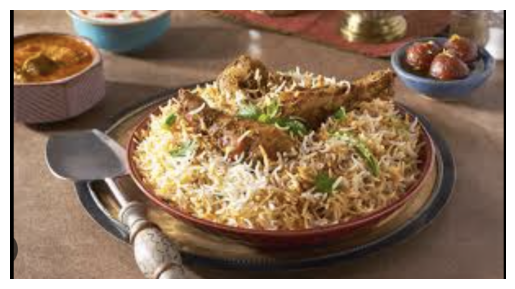

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image file
image = Image.open(img)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off') # Turn off axis numbers and ticks
# plt.show()

In [36]:
# ✅ Ensure image is in correct format
from PIL import Image
import google.generativeai as genai

def query_gemini_vision(image, prompt, model_name="gemini-2.0-flash"):
    # try:
        # Ensure image is PIL Image object
        if not isinstance(image, Image.Image):
            return "Error: Image must be a PIL Image object"

        # Initialize the model
        model = genai.GenerativeModel(model_name)

        # Generate content with image and text
        response = model.generate_content([prompt, image])
        mark=response.text
        display(Markdown(mark))
        # return response.text
    # except Exception as e:
    #     return f"Error calling Gemini API: {e}"

In [41]:
prompt="""
context: I am analying food image for a calorie traking application.
instuctions:please identify the food in the image.
Input: The image i am about to show.
Output: Provide the name of the food in the image. Breif description of the food. The calories and specific ingredients or nutriants in the food and what color is the food in the image. What does it taste like sweet,savory,spicy or any other taste.
"""

In [42]:
query_gemini_vision(image, prompt)

Here's the food analysis:

*   **Name:** Chicken Biryani

*   **Description:** It's a mixed rice dish originating from the Indian subcontinent. It's made with basmati rice, marinated chicken, and a blend of spices. It is garnished with cilantro and green chilies.

*   **Calories and Nutrients (estimated):** A typical serving (1 cup) may contain 300-400 calories, with significant carbs from rice, protein from chicken, and fats from oils used in preparation. Spices offer micronutrients and antioxidants.

*   **Color:** The rice is a mix of white and golden-brown. Chicken looks dark brown with hints of reddish-brown.

*   **Taste:** Savory and mildly spicy. It is also aromatic.

In [47]:
structured_nutrition_prompt = """
# Nutritional Analysis Task

## Context
You are a nutrition expert analyzing food images to provide accurate nutritional information.

## Instructions
Analyze the food item in the image and provide estimated nutritional information.

## Input
- An image of a food item

## Output
Provide the following estimated nutritional information for a typical serving:
- food_name (string)
- serving_description (string, e.g., '1 slice', '100g', '1 cup')
- calories (float)
- fat_grams (float)
- protein_grams (float)
- sugar_grams (float)
- fiber_grams (float)
- carbohydrates_grams (float)
- fat_grams(float)
- Healty (string: 'Healty', 'Not healty')
- confidence_level (string: 'High', 'Medium', or 'Low')

**IMPORTANT:** Respond ONLY with a single JSON object containing these fields.

Example valid JSON response:
{
    "food_name": "Banana",
    "serving_description": "1 medium banana (approx 118g)",
    "calories": 105.0,
    "fat_grams": 0.4,
    "protein_grams": 1.3,
    "sugar_grams": 12.2,
    "fiber_grams": 3.1,
    "carbohydrates_grams": 2,
    "fat_grams":0.5,
    "Healty": "Healty
    "confidence_level": "High"
}
"""

In [48]:
query_gemini_vision(image, structured_nutrition_prompt)

```json
{
    "food_name": "Chicken Biryani",
    "serving_description": "1 cup (approx 220g)",
    "calories": 420.0,
    "fat_grams": 20.0,
    "protein_grams": 25.0,
    "sugar_grams": 3.0,
    "fiber_grams": 2.0,
    "carbohydrates_grams": 40.0,
    "fat_grams": 20.0,
    "Healty": "Not healty",
    "confidence_level": "Medium"
}
```

Adavance Tracker

In [9]:
daily_limit=2000
consumed=0
last_date=datetime.now().date()

In [36]:
structured_nutrition_prompt = """
# Nutritional Analysis Task

## Context
You are a nutrition expert analyzing food images to provide accurate nutritional information.

## Instructions
Analyze the food item in the image and provide estimated nutritional information.

## Input
- An image of a food item

## Output
Provide the following estimated nutritional information for a typical serving:
- food_name (string)
- serving_description (string, e.g., '1 slice', '100g', '1 cup')
- calories (float)
- fat_grams (float)
- protein_grams (float)
- sugar_grams (float)
- fiber_grams (float)
- carbohydrates_grams (float)
- fat_grams(float)
- Healty (string: 'Healty', 'Not healty')
- confidence_level (string: 'High', 'Medium', or 'Low')

**IMPORTANT:** Respond ONLY with a single JSON object containing these fields. Do not include any other text, explanations, or formatting.

Example valid JSON response:
{
    "food_name": "Banana",
    "serving_description": "1 medium banana (approx 118g)",
    "calories": 105.0,
    "fat_grams": 0.4,
    "protein_grams": 1.3,
    "sugar_grams": 12.2,
    "fiber_grams": 3.1,
    "carbohydrates_grams": 2,
    "fat_grams":0.5,
    "Healty": "Healty",
    "confidence_level": "High"
}
"""

In [41]:
import json
import re

def advance(image_path):
    image = Image.open(image_path)
    model = genai.GenerativeModel('gemini-2.0-flash')

    response = model.generate_content(
        [structured_nutrition_prompt, image],
        generation_config=genai.types.GenerationConfig(
            temperature=0.7,
            max_output_tokens=2000,
            top_p=0.8,
            top_k=40,
        ),
    )

    # Step 1: clean backticks and extract JSON string
    raw_text = response.text.strip()
    cleaned = re.sub(r"^```json|```$", "", raw_text).strip()

    # Step 2: parse JSON string
    return json.loads(cleaned)


In [15]:
img="/content/Screenshot 2025-07-15 at 7.40.33 AM.png"

In [60]:
advance(img)

{'food_name': 'Chicken Biryani',
 'serving_description': '1 cup',
 'calories': 450.0,
 'fat_grams': 20.0,
 'protein_grams': 25.0,
 'sugar_grams': 5.0,
 'fiber_grams': 2.0,
 'carbohydrates_grams': 45.0,
 'Healty': 'Not healty',
 'confidence_level': 'Medium'}

In [34]:
def check_new_day():
  global consumed
  global last_date
  today=datetime.now().date()
  if today!=last_date:
    consumed=0
    last_date=today

In [53]:
def track(image_path):
    global consumed

    # Check if new day
    check_new_day()

    # Analyze food
    food = advance(image_path)

    # Add calories
    consumed += food['calories']

    # Show results
    print(f"Food: {food['food_name']}")
    print(f"Serving: {food['calories']}")
    print(f"Serving: {food['serving_description']}")
    print(f"Total consumed: {consumed}")
    print(f"Remaining: {daily_limit - consumed}")

    if consumed> daily_limit:
        print("WARNING: Over daily limit!")

def reset_day():
    global consumed
    consumed = 0
    print("Daily calories reset!")



In [54]:
track(img)

Food: Chicken Biryani
Serving: 450.0
Serving: 1 cup (approx 225g)
Total consumed: 875.0
Remaining: 1125.0


In [47]:
track(img)

Food: Chicken Biryani
Serving: 420.0
Serving: 1 cup (approx 227g)
Total consumed: 1220.0
Remaining: 780.0


In [58]:
reset_day()

Daily calories reset!


In [59]:
track(img)

Food: Chicken Biryani
Serving: 420.0
Serving: 1 cup (approx 227g)
Total consumed: 420.0
Remaining: 1580.0
